<a href="https://colab.research.google.com/github/ishtika06/Corizo-Minor-Project/blob/main/corizo_minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
import matplotlib. dates as mandates

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils import plot_model

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Minor Project Dataset (Stock Price Prediction).csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
# Calculate the percentage of missing values in each column
Missing_values = df.isnull().sum() / len(df) * 100
# Print the percentage of missing values for each column
print(Missing_values)

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64


<Axes: >

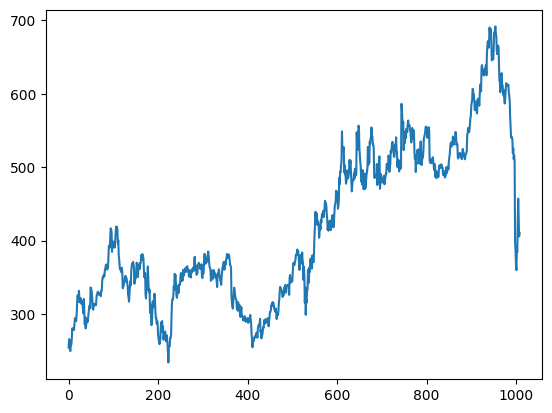

In [ ]:
#Plot the True Adj Close Value
df['Adj Close'].plot()

In [ ]:
#Set Target Variable
output_var = PD.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [ ]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.061253,0.038304,0.041331,0.186150
1,0.030059,0.035640,0.030273,0.198264
2,0.071243,0.048408,0.072770,0.135690
3,0.072334,0.037683,0.041265,0.141320
4,0.043474,0.011436,0.010729,0.272902


In [ ]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

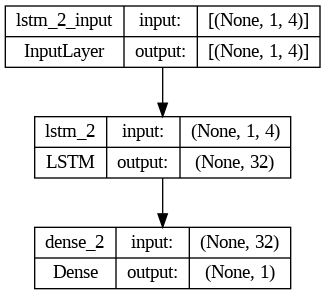

In [ ]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
lstm.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
29/29 [==============================] - 1s 2ms/step - loss: 170011.2031
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 169921.2656
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 169803.2344
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 169632.5625
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 169393.3125
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 169063.3594
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 168624.5156
Epoch 8/100
29/29 [==============================] - 0s 3ms/step - loss: 168059.7656
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 167359.0938
Epoch 10/100
29/29 [==============================] - 0s 2ms/step - loss: 166495.7188
Epoch 11/100
29/29 [==============================] - 0s 2ms/step - loss: 165472.2500
Epoch 12/100
29/29 [==============================] - 0s 2ms/st

In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

3/3 [==============================] - 0s 4ms/step


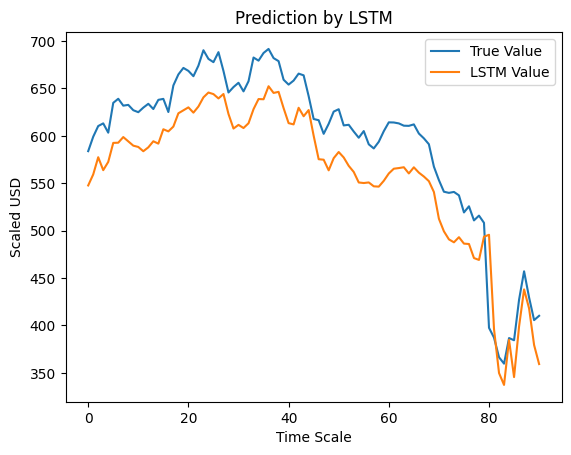

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()